# Introduction to Data Science

Authors: Lior Tondovski, Ilan Vasilevski, Maya Vilenko

---

### imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split


from cluster_utils import *
from Config import *


In [2]:
data = pd.read_csv(clustering_data_path)
data.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
data.head(3)

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10
0,-1.784220,9.139177,2.517077,-6.691300,3.332583,-6.189314,-8.294717,-5.527558,-9.150377,-3.437419
1,4.513056,-6.242134,-9.764999,8.975386,0.213133,-5.610271,6.194787,-0.247325,-1.000023,-9.091131
2,1.076570,-6.806062,-11.354346,11.589776,1.223487,-4.481565,5.119435,-0.036395,-2.308850,-5.820222


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature 1   2500 non-null   float64
 1   feature 2   2500 non-null   float64
 2   feature 3   2500 non-null   float64
 3   feature 4   2500 non-null   float64
 4   feature 5   2500 non-null   float64
 5   feature 6   2500 non-null   float64
 6   feature 7   2500 non-null   float64
 7   feature 8   2500 non-null   float64
 8   feature 9   2500 non-null   float64
 9   feature 10  2500 non-null   float64
dtypes: float64(10)
memory usage: 195.4 KB


In [5]:
data.describe()

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,-0.058067,-0.652801,0.340646,-0.657468,-0.140713,-3.201743,-0.924817,-0.042125,-5.532473,-4.036382
std,4.985677,6.041751,7.507013,5.203314,3.240087,4.256396,7.213071,3.969351,4.101869,2.805283
min,-10.766832,-11.994511,-13.340450,-9.713562,-9.081393,-11.339145,-11.861602,-8.073032,-12.742542,-11.304777
25%,-3.156292,-5.558896,-7.589439,-4.771484,-1.773954,-6.712819,-7.586765,-3.609371,-8.919789,-6.126161
50%,-0.774796,-0.793572,2.038051,-1.542587,0.529864,-5.118522,-3.083608,-0.396338,-7.425201,-4.336525
75%,3.255897,1.480191,7.622533,1.259217,2.143197,1.111768,5.737658,3.519774,-1.306876,-2.232566
max,12.238539,13.707162,12.448849,12.053077,6.302356,6.789144,13.841431,9.729432,4.325894,3.408461


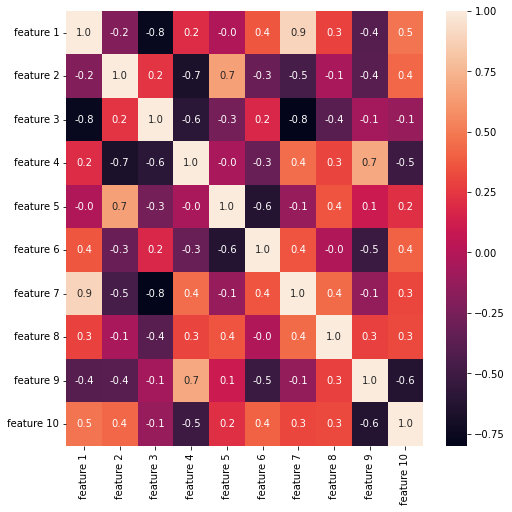

In [6]:
# heatmap for correlation
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, fmt='.1f')
plt.show()

#### EDA conclusions
1. There are no missing values in the dataset
2. There is a differnce in the magnitude of the features. Therefore we need to scale the features.
3. Some features are highly correlated with each other. Therefore we need to reduce the dimensionality of the data. 

# Dimensionality reduction and Visualization

### TSNE

In [7]:
# perform TSNE on the data to visualize it
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, init='random')
tsne_results = tsne.fit_transform(data.values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2500 samples in 0.004s...
[t-SNE] Computed neighbors for 2500 samples in 0.107s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2500
[t-SNE] Computed conditional probabilities for sample 2000 / 2500
[t-SNE] Computed conditional probabilities for sample 2500 / 2500
[t-SNE] Mean sigma: 1.681704
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.234108
[t-SNE] KL divergence after 300 iterations: 1.884773


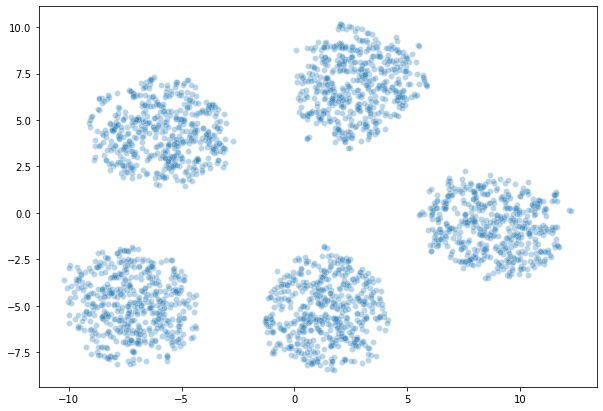

In [8]:
# plot the results
plt.figure(figsize=(10,7))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    palette=sns.color_palette("hls", 10),
    alpha=0.3
)
plt.show()

#### TSNE Conclusions
The data seems "clusterable", we can clearly see 5 groups.<br>
for methods requring a number of clusters we can use 5.

### PCA 

In [9]:
# perform PCA Dimensionality Reduction
pca = PCA()
pca_result = pca.fit_transform(data)

In [10]:
np.cumsum(pca.explained_variance_ratio_).shape[0]

10

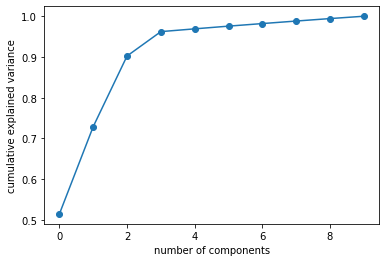

In [11]:
# plot PCA explained variance by number of components
var_cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(var_cumsum)
plt.scatter(x=range(var_cumsum.shape[0]), y = var_cumsum)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

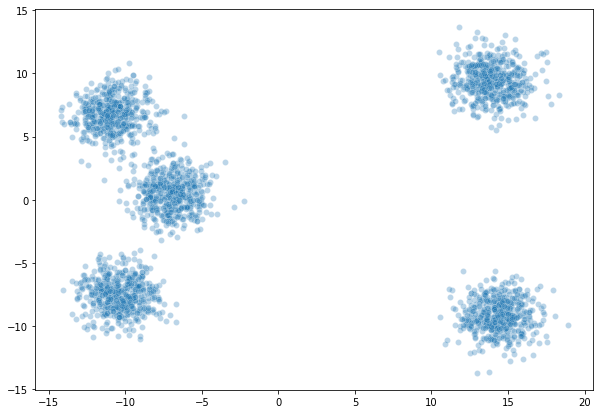

In [12]:
# plot the results
plt.figure(figsize=(10,7))
sns.scatterplot(
    x=pca_result[:,0], y=pca_result[:,1],
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3
)
plt.show()

#### PCA Conclusions
1. By using pca we again find 5 group. However, the groups are not as evenly distributed and clear as in the TSNE. 
2. We can see 2 "elbows" in the explained variance ratio plot. By using 2 or 3 components we can explain more than 90% of the variance.

<br>
To sum up, we should use a lower dimension, and we can use 5 clusters for the methods that require a number of clusters. For convinience of visualizations we will use 2 dimensional data.

# Clustering

### Kmeans


First we will try to find the dimensionality of the data that yeilds the best silhouette score, using kmeans.

In [13]:
scores = []
for i in range(1,pca_result.shape[1]):
    pca_data = pca_result[:,:i]
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(pca_data)
    clusters = kmeans.predict(pca_data)
    scores.append(silhouette_score(pca_data, clusters))
df_dim = pd.DataFrame({'num_components':range(1,pca_result.shape[1]), 'silhouette_score':scores})

In [14]:
df_dim.sort_values(by='silhouette_score', ascending=False)

,num_components,silhouette_score
2,3,0.827041
3,4,0.817751
4,5,0.793237
5,6,0.772241
1,2,0.766904
6,7,0.754272
7,8,0.737986
8,9,0.723165
0,1,0.557775


We can see that the best silhouette score is achieved when using 3 components. Therefore we will use 3 components for the rest of the clustering methods. <br>
for convinience of visualizations we will use the first 2 components.

In [15]:
best_num_components = df_dim.sort_values(by='silhouette_score', ascending=False).iloc[0]['num_components']
pca_data = pca_result[:,:int(best_num_components)]

In [16]:
# perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pca_data)
clusters = kmeans.predict(pca_data)

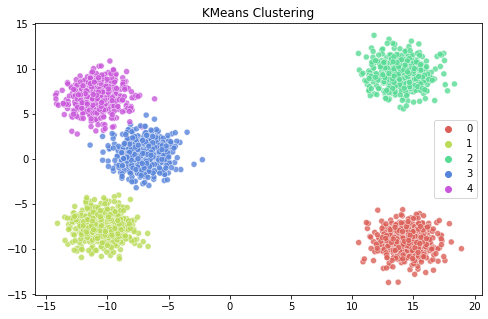

Silhouette Score: 0.83


In [20]:
# plot the results
plot_clusters_2D(pca_data, clusters, 'KMeans Clustering')
print(f'Silhouette Score: {round(silhouette_score(pca_data, clusters),2)}')

3 Dimensional plot of the clusters

In [25]:
plot_clusters_3D(pca_data, clusters, 'KMeans Clustering',figsize=(600,500))

### DBSCAN

#### Hyper Parameter Tuning
Finding the best eps and min_samples for DBSCAN using the 2 dimensional PCA data.

In [26]:
min_dists = []
for i in range(pca_data.shape[0]):
    point = pca_data[i]
    other = np.delete(pca_data, i, axis=0)
    min_dists.append(np.min(np.linalg.norm(point - other, axis=1)))
min_dists = np.array(min_dists)

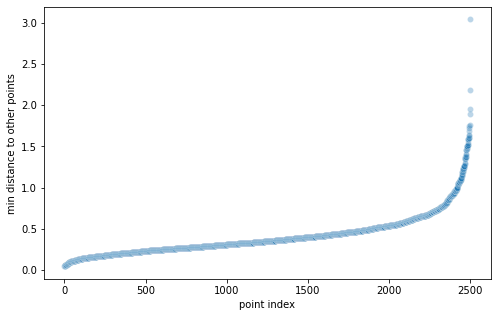

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=range(min_dists.shape[0]), y=np.sort(min_dists),
    alpha=0.3
)
plt.xlabel('point index')
plt.ylabel('min distance to other points')
plt.show()

We can see that the minimal distance between points is between 0-2.5
<br>
We will search for the best eps in the range of 0-2 using intervals of 0.5, and the best min_samples in the range of 1-10. using the silhouette score as the metric.

In [28]:

epsilons = np.linspace(0.5, 2.5, 5)
min_samples = np.linspace(1, 10, 10)

In [29]:
results = []
for eps in epsilons:
    for min_sample in min_samples:
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(pca_data)
        clusters = dbscan.labels_
        score = silhouette_score(pca_data, clusters)
        num_clusters = len(np.unique(clusters[clusters>=0]))
        # save the results
        results.append([eps, min_sample, score, num_clusters])

df_res = pd.DataFrame(results, columns=['eps', 'min_samples', 'score', 'num_clusters'])

In [33]:
df_res[df_res['num_clusters']==5].sort_values(by='score', ascending=False).head(5)

,eps,min_samples,score,num_clusters
39,2.0,10.0,0.824654,5
34,2.0,5.0,0.813938,5
35,2.0,6.0,0.813938,5
38,2.0,9.0,0.813938,5
37,2.0,8.0,0.813938,5


We will use eps=2 and min samples= 10. Because it achieves the highest silhouette score, and creates the expected 5 clusters.

#### DBSCAN clustering

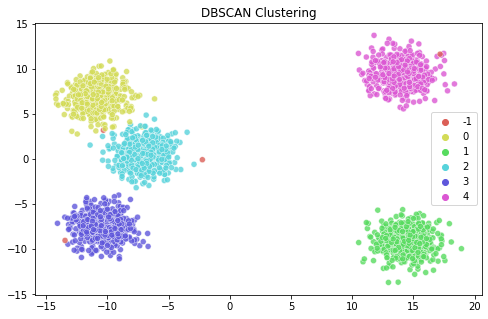

Silhouette Score: 0.82


In [34]:
# perform DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=10)
dbscan.fit(pca_data)
clusters = dbscan.labels_
score = silhouette_score(pca_data, clusters)
plot_clusters_2D(pca_data, clusters, 'DBSCAN Clustering')
print(f'Silhouette Score: {round(score,2)}')

In [35]:
plot_clusters_3D(pca_data, clusters, 'DBSCAN Clustering',figsize=(600,500))

# Conclusions

1. We can see that the clustering methods are able to find the 5 clusters in the data. 

2. We can achieve better clustering using a lower dimensionality. In our case we chose PCA to reduce the dimensionality.

2. The best method, in terms of silhouette score, is Kmeans. We assume that this is because the clusters in the data are "centroid-based". However the margin between the methods is small, and we can see that the clusters are very similar.

3. The main differnces between the methods are:
- Kmeans results can be used on new data, as opposed to DBSCAN that will require retraining.
- Kmeans requires a number of clusters, which we can detect in this dataset using TSNE. Therefore we can use Kmeans without hyper parameter tuning.
- DBSCAN was able to detect outliers, which is not the case for Kmeans.
